<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Random Forest)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Random forest](#rf)**

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')

#### Load the csv file

In [2]:
df=pd.read_csv('emp_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1580 non-null   int64 
 1   Attrition                1580 non-null   object
 2   BusinessTravel           1580 non-null   object
 3   Department               1580 non-null   object
 4   DistanceFromHome         1580 non-null   int64 
 5   EducationField           1580 non-null   object
 6   EnvironmentSatisfaction  1580 non-null   int64 
 7   Gender                   1580 non-null   object
 8   JobInvolvement           1580 non-null   int64 
 9   JobLevel                 1580 non-null   int64 
 10  JobRole                  1580 non-null   object
 11  JobSatisfaction          1580 non-null   int64 
 12  MonthlyIncome            1580 non-null   int64 
 13  NumCompaniesWorked       1580 non-null   int64 
 14  OverTime                 1580 non-null  

In [4]:
df.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.0,1580.000000
mean,34.339241,9.743671,2.648734,2.660127,1.705696,2.668354,4957.425949,2.470886,13.942405,3.0,5.206329
std,8.828037,8.227881,1.107876,0.755176,0.800629,1.105636,3059.158533,2.232193,2.425033,0.0,3.949229
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.0,0.000000
25%,28.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2571.750000,1.000000,12.000000,3.0,2.000000
50%,33.000000,8.000000,3.000000,3.000000,2.000000,3.000000,4148.000000,1.000000,13.000000,3.0,5.000000
75%,39.000000,16.000000,4.000000,3.000000,2.000000,4.000000,6397.000000,4.000000,16.000000,3.0,8.000000
max,60.000000,29.000000,4.000000,4.000000,4.000000,4.000000,16555.000000,8.000000,19.000000,3.0,18.000000


In [5]:
df.drop('PerformanceRating', axis=1, inplace=True)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR

In [7]:
df=df[~((df<lower) | (df>upper)).any(axis=1)]
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,30,No,Travel_Rarely,Research & Development,2,Medical,2,Male,2,1,Laboratory Technician,4,2720,0,No,13,5
1575,28,Yes,Non-Travel,Research & Development,24,Technical Degree,2,Male,2,3,Healthcare Representative,1,8722,1,No,12,10
1577,30,Yes,Travel_Rarely,Sales,9,Medical,2,Male,3,1,Sales Representative,4,1081,1,No,13,1
1578,31,No,Travel_Frequently,Research & Development,1,Life Sciences,3,Female,3,2,Manufacturing Director,1,4148,1,No,12,4


In [8]:
df=df.reset_index(drop=True)

In [9]:
df_categoric_features=df.select_dtypes(include=object)
df_categoric_features=pd.get_dummies(df_categoric_features, drop_first=True)
df_num=df.select_dtypes(exclude=object)
scalar=StandardScaler()
df_num=pd.DataFrame(scalar.fit_transform(df_num), columns=df_num.columns)
df_dummy=pd.concat([df_num,df_categoric_features],axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a Random Forest model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
X_2=df_dummy[['MonthlyIncome','EnvironmentSatisfaction']]
y_2=df_dummy['Attrition_Yes']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=100)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [12]:
rf_classification_2 = RandomForestClassifier(n_estimators=10, random_state=10)

rf_model_2 = rf_classification_2.fit(X_train_2, y_train_2)

In [13]:
y_train_pred_2 = rf_model_2.predict(X_train_2)

print(classification_report(y_train_2, y_train_pred_2))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       566
           1       0.97      0.99      0.98       474

    accuracy                           0.98      1040
   macro avg       0.98      0.98      0.98      1040
weighted avg       0.98      0.98      0.98      1040



In [14]:
y_pred_test_2 = rf_model_2.predict(X_test_2)

print(classification_report(y_test_2, y_pred_test_2))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       249
           1       0.79      0.93      0.86       198

    accuracy                           0.86       447
   macro avg       0.87      0.87      0.86       447
weighted avg       0.87      0.86      0.86       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
X_3=df_dummy.drop('Attrition_Yes', axis=1)
y_3=df_dummy['Attrition_Yes']
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=100)

In [16]:
rf_classification_3 = RandomForestClassifier(n_estimators=10, random_state=10)

rf_model_3 = rf_classification_3.fit(X_train_3, y_train_3)

In [17]:
y_train_pred_3 = rf_model_3.predict(X_train_3)

print(classification_report(y_train_3, y_train_pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       474

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040



In [18]:
y_pred_test_3 = rf_model_3.predict(X_test_3)

print(classification_report(y_test_3, y_pred_test_3))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       249
           1       0.93      0.95      0.94       198

    accuracy                           0.95       447
   macro avg       0.94      0.95      0.95       447
weighted avg       0.95      0.95      0.95       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
tuned_parameters = [{'criterion':['entropy','gini'],
                     'n_estimators':[90, 100, 150, 200],
                    'max_depth':[10,15,20],
                    'min_samples_split':[2, 5, 8]}]

random_forest_classification = RandomForestClassifier(random_state=10)

In [21]:
%%time
rf_grid = GridSearchCV(estimator=random_forest_classification, param_grid=tuned_parameters, cv=5)

# fit the model on X_train and y_train using fit()
rf_grid_model = rf_grid.fit(X_train_3, y_train_3)

print('Best parameters for random forest classifier:', rf_grid_model.best_params_,'\n')

Best parameters for random forest classifier: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 90} 

CPU times: total: 2min 38s
Wall time: 4min 23s


In [23]:
rf_model_3 = RandomForestClassifier(**rf_grid_model.best_params_, random_state=10)

rf_model_3 = rf_model_3.fit(X_train_3, y_train_3)

In [25]:
train_pred_3 = rf_model_3.predict(X_train_3)

print(classification_report(y_train_3, train_pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       474

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040



In [26]:
y_pred_test_3 = rf_model_3.predict(X_test_3)

print(classification_report(y_test_3, y_pred_test_3))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       249
           1       0.94      0.95      0.95       198

    accuracy                           0.95       447
   macro avg       0.95      0.95      0.95       447
weighted avg       0.95      0.95      0.95       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
%%time
rf_grid = GridSearchCV(estimator=random_forest_classification, param_grid=tuned_parameters, cv=10)

# fit the model on X_train and y_train using fit()
rf_grid_model = rf_grid.fit(X_train_3, y_train_3)

print('Best parameters for random forest classifier:', rf_grid_model.best_params_,'\n')

Best parameters for random forest classifier: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200} 

CPU times: total: 5min 6s
Wall time: 9min 34s


In [30]:
rf_model_3 = RandomForestClassifier(**rf_grid_model.best_params_, random_state=10)

rf_model_3 = rf_model_3.fit(X_train_3, y_train_3)

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve

In [39]:
def roc_plot(model,X,y,label):
    # K Nearest Neighbors
    y_pred = model.predict_proba(X)[:,1]
    
    # The roc_curve() returns the values for false positive rate, true positive and threshold
    # pass the actual target values and predicted probabilities to the function


    fpr, tpr, thresholds = roc_curve(y, y_pred)
    auc_score = round(roc_auc_score(y, y_pred),4)

    # plot the ROC curve
    plt.plot(fpr, tpr,label = label+'(AUC Score = %0.4f)' % auc_score)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # add plot and axes labels
    # set text size using 'fontsize
    plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    #add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    #'s' is the text
    # use round() to round-off the AUC score upto 4 digits
    plt.legend(loc = 'lower right')

    # plot the grid
    plt.grid(True)

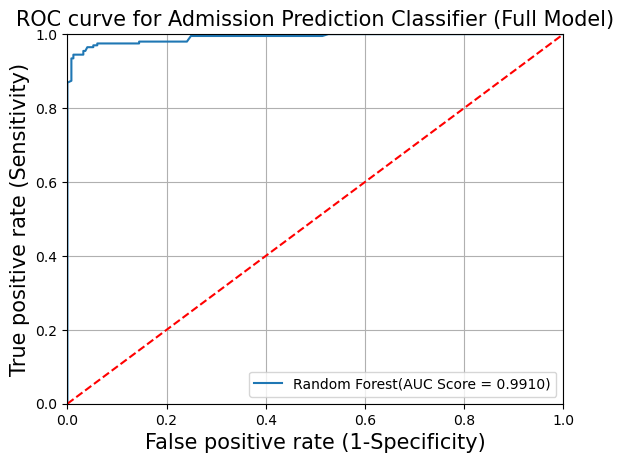

In [40]:
roc_plot(rf_model_3,X_test_3,y_test_3,'Random Forest')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [53]:
ft=rf_model_3.feature_importances_
print(ft)
dataframe1 = pd.DataFrame({'Feature': X_train_3.columns, 'Importance': ft})
dataframe1 = dataframe1.sort_values(by='Importance', ascending=False).head(10)
dataframe1

[0.11664262 0.08387406 0.04975783 0.04461024 0.03570162 0.05130806
 0.13810576 0.06299019 0.06441156 0.09498347 0.01936239 0.01368284
 0.01127017 0.01239535 0.01571877 0.00959924 0.01672928 0.00816348
 0.01144133 0.022019   0.00446233 0.0110394  0.00041949 0.00683277
 0.00033285 0.01427763 0.00979346 0.00992711 0.06014772]


,Feature,Importance
6,MonthlyIncome,0.138106
0,Age,0.116643
9,YearsAtCompany,0.094983
1,DistanceFromHome,0.083874
8,PercentSalaryHike,0.064412
7,NumCompaniesWorked,0.062990
28,OverTime_Yes,0.060148
5,JobSatisfaction,0.051308
2,EnvironmentSatisfaction,0.049758
3,JobInvolvement,0.044610


Thus we can see that `MonthlyIncome`, `Age` and `YearsAtCompany` are the most import features when predicting whether or not an employee will leave the company.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
sorted_feature_names = dataframe1['Feature'].tolist()
sorted_feature_names

['MonthlyIncome',
 'Age',
 'YearsAtCompany',
 'DistanceFromHome',
 'PercentSalaryHike',
 'NumCompaniesWorked',
 'OverTime_Yes',
 'JobSatisfaction',
 'EnvironmentSatisfaction',
 'JobInvolvement']

In [55]:
X_7=df_dummy[['MonthlyIncome','Age','YearsAtCompany','DistanceFromHome','PercentSalaryHike','NumCompaniesWorked',
              'OverTime_Yes','JobSatisfaction','EnvironmentSatisfaction','JobInvolvement']]
y_7=df_dummy['Attrition_Yes']
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size=0.3, random_state=100)

In [59]:
rf_classification_7 = RandomForestClassifier(n_estimators=10, random_state=10)

rf_model_7 = rf_classification_7.fit(X_train_7, y_train_7)

In [60]:
y_train_pred_7 = rf_model_7.predict(X_train_7)

print(classification_report(y_train_7, y_train_pred_7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       474

    accuracy                           1.00      1040
   macro avg       1.00      1.00      1.00      1040
weighted avg       1.00      1.00      1.00      1040



In [61]:
y_pred_test_7 = rf_model_7.predict(X_test_7)

print(classification_report(y_test_7, y_pred_test_7))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       249
           1       0.88      0.97      0.93       198

    accuracy                           0.93       447
   macro avg       0.93      0.93      0.93       447
weighted avg       0.93      0.93      0.93       447



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 7. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

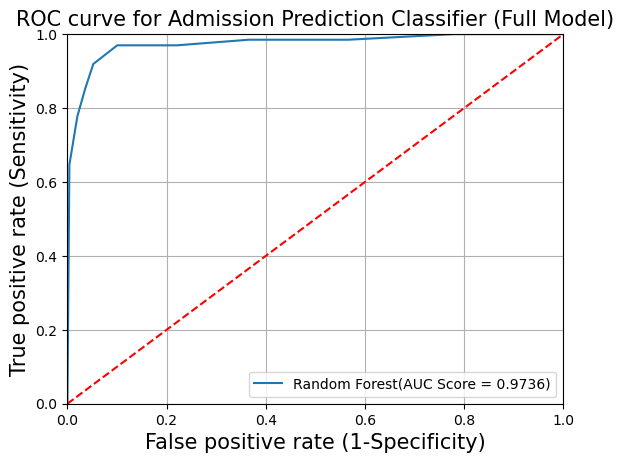

In [62]:
roc_plot(rf_model_7,X_test_7,y_test_7,'Random Forest')